In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [88]:
data = pd.read_csv("../../framingham_heart_study.csv")

In [89]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [90]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [91]:
data.shape

(4240, 16)

In [92]:
data.isnull().values.any(), data.isnull().values.sum()

(True, 645)

In [93]:
# imputation of missing values
new_data = data.fillna(method="bfill", axis=0) # axis=0 means you replace with the value in the row

In [94]:
new_data.isnull().values.any(), new_data.isnull().values.sum()

(False, 0)

In [95]:
new_data.shape

(4240, 16)

In [96]:
new_data['TenYearCHD'].value_counts() # clear indication of an imbalanced dataset

0    3596
1     644
Name: TenYearCHD, dtype: int64

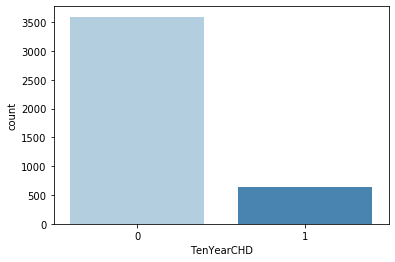

In [97]:
sns.countplot(x='TenYearCHD', data=new_data, palette='Blues')

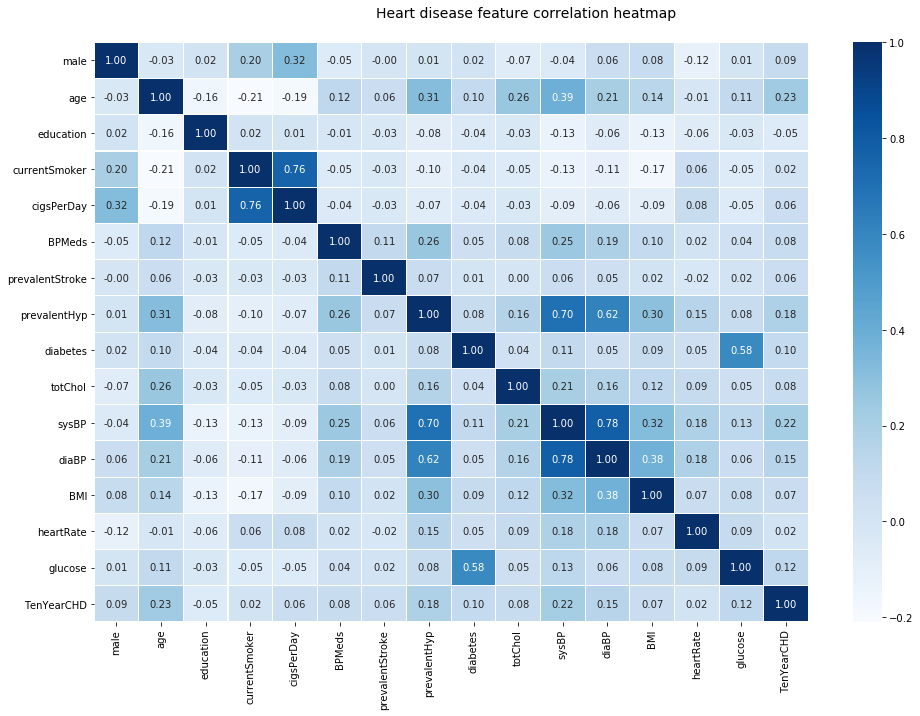

In [98]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(16, 10))
corr = new_data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Blues",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Heart disease feature correlation heatmap', fontsize=14)

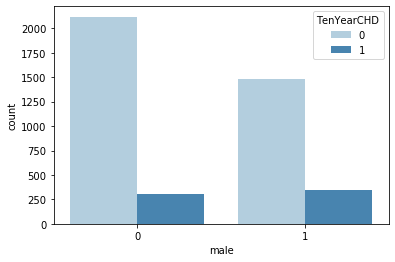

In [99]:
sns.countplot(x="male", data=new_data, palette="Blues", hue="TenYearCHD")

<function matplotlib.pyplot.show(*args, **kw)>

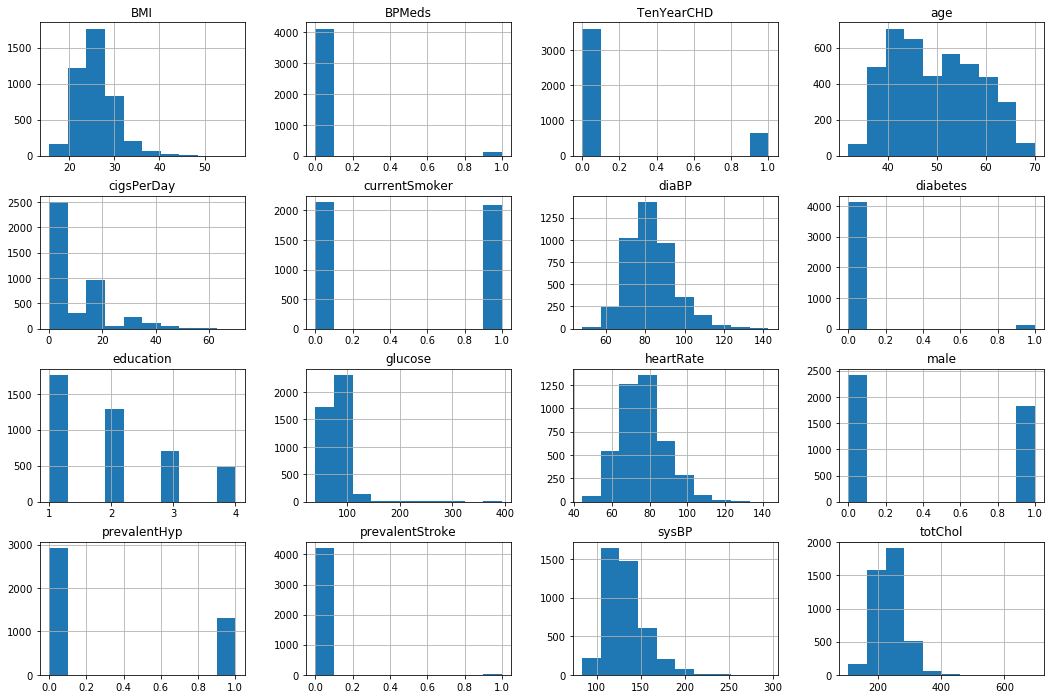

In [100]:
new_data.hist(figsize=(18,12))
plt.show

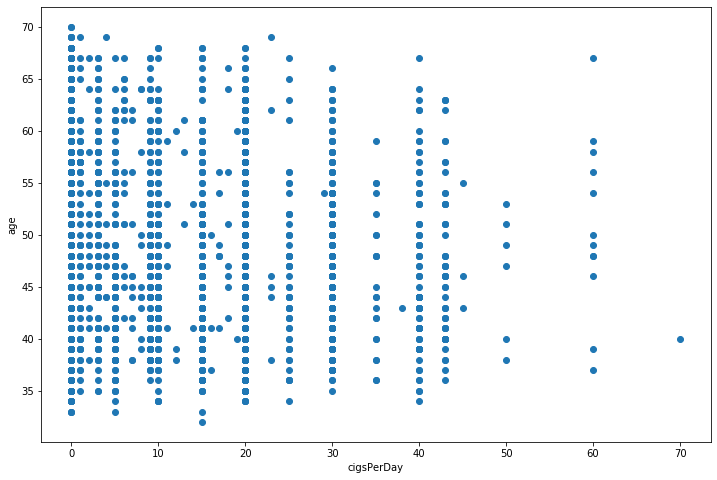

In [101]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(new_data['cigsPerDay'], new_data['age'])
ax.set_xlabel('cigsPerDay')
ax.set_ylabel('age')
plt.show()

Text(0.5, 1.0, 'Visualization of outliers in FHS data set')

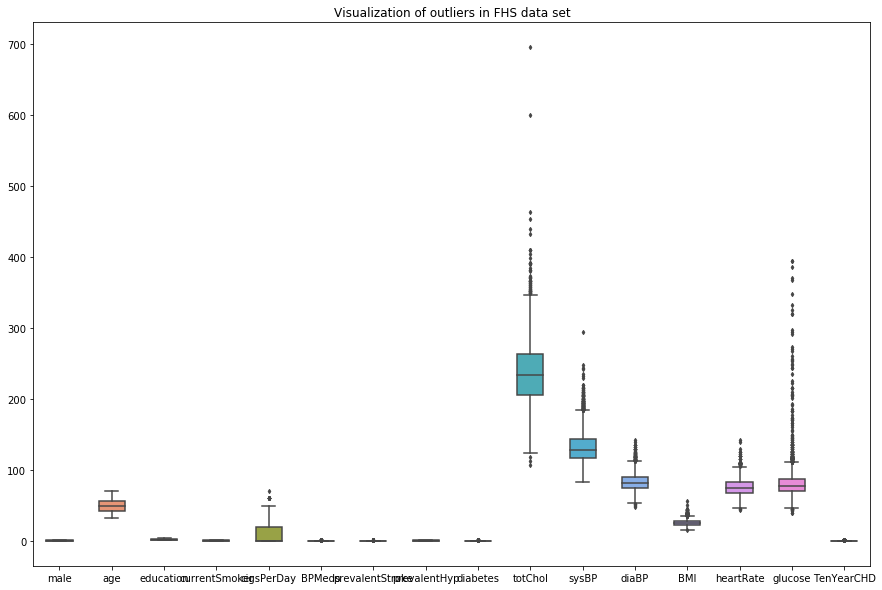

In [102]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=new_data, width= 0.5,ax=ax,  fliersize=3)
plt.title("Visualization of outliers in FHS data set")

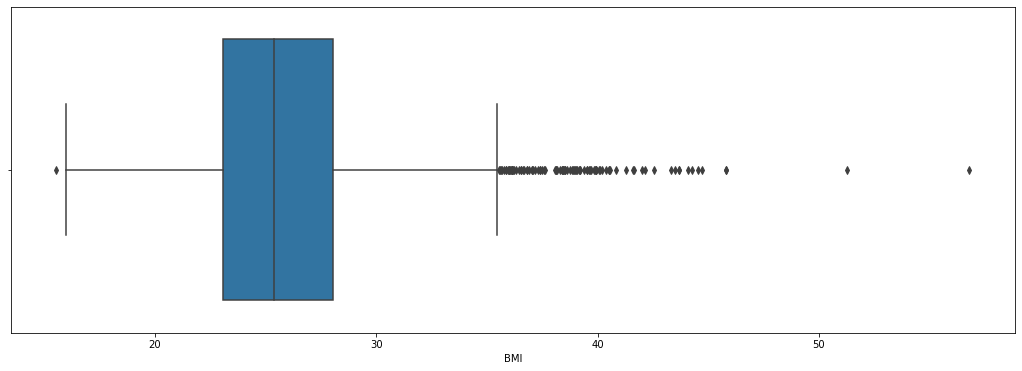

In [105]:
plt.figure(figsize=(18,6))
sns.boxplot(new_data['BMI'])

In [53]:
new_data2 = new_data[new_data['glucose'] < new_data['glucose'].std()*3]


In [54]:
new_data['glucose'].max(), new_data2['glucose'].max()

(394.0, 71.0)

In [67]:
# determining lower and upper quartiles
# lower_quartile = new_data['glucose'].quantile(.25)
# upper_quartile = new_data['glucose'].quantile(.75)
# print("Q1:", lower_quartile)
# print("Q3:", upper_quartile)

# determining lower and upper quartiles
Q1 = new_data.quantile(0.25)
Q3 = new_data.quantile(0.75)


In [76]:
# IQR for each feature
IQR = Q3 - Q1
print(IQR)

male                1.0
age                13.0
education           2.0
currentSmoker       1.0
cigsPerDay         20.0
BPMeds              0.0
prevalentStroke     0.0
prevalentHyp        1.0
diabetes            0.0
totChol            55.0
sysBP              24.0
diaBP              14.0
BMI                 4.7
heartRate           7.0
glucose            15.0
TenYearCHD          0.0
dtype: float64


In [77]:
# true means presence of outliers and false means absence
#print(new_data < (Q1 - 1.5 * IQR)) |(new_data > (Q3 + 1.5 * IQR))

In [83]:
# filgtering outliers
new_data2 = new_data[~((new_data < (Q1 - 1.5 * IQR)) |(new_data > (Q3 + 1.5 * IQR))).any(axis=1)]
new_data2.shape

(1611, 16)

In [81]:
# determining minimum and maximum non-outliers
#min_non_outlier = lower_quartile - 1.5*iqr
#max_non_outlier = upper_quartile + 1.5*iqr
#print("Minimum non-outlier:",min_non_outlier)
#print("Maximum non-outlier:",max_non_outlier)


# outliers = ((new_data["cigsPerDay"]< -30) | (new_data["cigsPerDay"]>50) | (new_data["totChol"]<120.5) 
#           | (new_data["totChol"]>348.5) | (new_data["sysBP"]<76.5) | (new_data['sysBP']>184.5) 
#            | (new_data["diaBP"]<52.5) | (new_data['diaBP']>112.5) | (new_data['BMI']<15.6) | (new_data['BMI']>35.5) 
#            | (new_data["heartRate"]<68) | (new_data['heartRate']>83) | (new_data["glucose"]<=47) | (new_data['glucose']>111))
# print("There are {} outliers".format(data[outliers]["TenYearCHD"].count()))


# dropping outliers
# new_data = new_data[~outliers]

Text(0.5, 1.0, 'Visualization after dropping outliers from FHS data set')

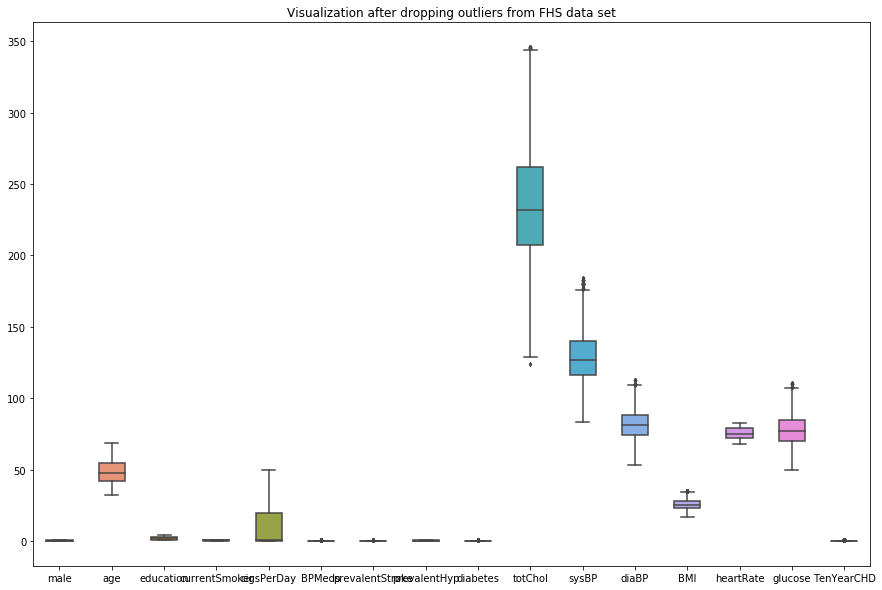

In [82]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=new_data, width= 0.5,ax=ax,  fliersize=3)
plt.title("Visualization after dropping outliers from FHS data set")

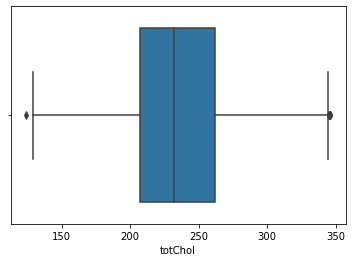

In [825]:
sns.boxplot(new_data['totChol'])

In [723]:
# using standard scaler and PCA with and without a balanced dataset
from sklearn.preprocessing import StandardScaler

In [407]:
# First step of PCA for dimesionality reduction is standard normalization.
# (checking if features follow a gaussian distribution where mean=0, std=1),
scaler = StandardScaler()
scaler.fit(new_data)

StandardScaler()

In [408]:
# all values are converted to same scale
scaled_new_data = scaler.transform(new_data)

In [409]:
# PCA for dimension reduction
from sklearn.decomposition import PCA

In [410]:
# n_components=2 means we convert number of features to 2
# If 0 < n_components < 1 and svd_solver == 'full', select the number of components 
# such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
# pca = PCA(n_components=6, svd_solver='full')
pca = PCA(n_components=9)

In [411]:
pca.fit(scaled_new_data)

PCA(n_components=9)

In [412]:
# transforming scaled data so that we reduce number of features
x_pca = pca.transform(scaled_new_data)

In [413]:
print(x_pca)

[[-1.76602356 -0.92467502 -1.22653329 ...  1.17809592 -1.59075223
   1.13842747]
 [-0.77614305  1.51696158  0.14424861 ...  0.1429877   0.68391832
   0.09452215]
 [ 3.91487243 -0.40570201 -1.99705965 ...  0.8336757  -0.9607832
  -0.45604289]
 ...
 [ 0.58805485  0.92790925 -0.42853322 ... -1.06075608 -0.48531355
  -0.5247359 ]
 [ 1.31381348 -0.42441186 -0.64277767 ...  0.93226778 -1.05305707
  -0.50353225]
 [ 0.39521391 -1.74747486  0.85095155 ... -0.29366126 -1.20640751
   0.10363084]]


In [414]:
scaled_new_data.shape

(1944, 16)

In [415]:
# shape of scaled data before dimension reduction
x_pca.shape

(1944, 9)

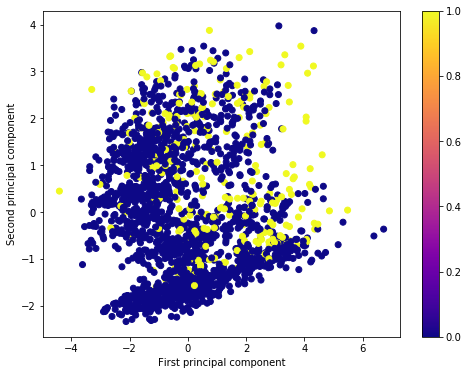

In [416]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=new_data["TenYearCHD"], cmap="plasma")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.colorbar()

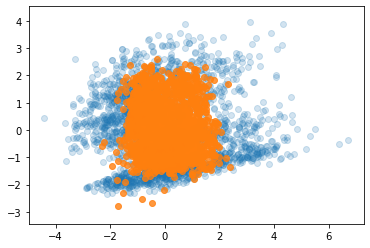

In [417]:
# new reduced dimensions vs initial data before dimension reduction
X_new = pca.inverse_transform(x_pca)
plt.scatter(x_pca[:, 0], x_pca[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 2], alpha=0.8)
plt.axis('equal');

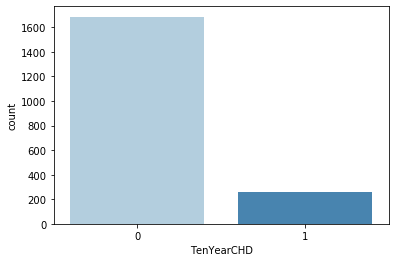

In [418]:
sns.countplot(x='TenYearCHD', data=new_data, palette='Blues')

In [419]:
# defining independent and dependent variables
X = x_pca
y = new_data["TenYearCHD"]

In [420]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [421]:
# After oversampling and PCA
# oversampling with SMOTE
from imblearn.over_sampling import SMOTE, ADASYN

In [422]:
sm = SMOTE(random_state=100)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [423]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print("********************************************")

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("********************************************")

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 179
Before OverSampling, counts of label '0': 1181 

********************************************
After OverSampling, the shape of train_X: (2362, 9)
After OverSampling, the shape of train_y: (2362,) 

********************************************
After OverSampling, counts of label '1': 1181
After OverSampling, counts of label '0': 1181


In [424]:
# svm classifier
svm_clf = SVC(kernel="linear")

In [425]:
import time
start = time.time()

#fitting the classifier
svm_clf.fit(X_train_res, y_train_res)

end = time.time()
print(end - start, "seconds")

0.03892779350280762 seconds


In [426]:
y_pred2 = svm_clf.predict(X_test)

In [427]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.9931506849315068


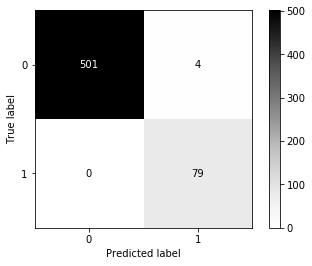

In [428]:
from sklearn.metrics import plot_confusion_matrix
print(plot_confusion_matrix(svm_clf, X_test, y_test, cmap=plt.cm.Greys))

In [429]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       505
           1       0.95      1.00      0.98        79

    accuracy                           0.99       584
   macro avg       0.98      1.00      0.99       584
weighted avg       0.99      0.99      0.99       584



In [430]:
# finding the best number of components after oversampling with SMOTE
for component in range(1,16):
    pca = PCA(n_components=component)
    pca.fit(scaled_new_data)
    x_pca = pca.transform(scaled_new_data)
    X = x_pca
    y = new_data["TenYearCHD"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    
    # fitting the training set with SMOTE
    X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

    svm_clf = SVC(kernel="linear").fit(X_train_res, y_train_res)
    y_pred = svm_clf.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Component:",component)
    print("Accuracy:",accuracy)
    print("********************")
    


Component: 1
Accuracy: 0.6523972602739726
********************
Component: 2
Accuracy: 0.6712328767123288
********************
Component: 3
Accuracy: 0.9366438356164384
********************
Component: 4
Accuracy: 0.940068493150685
********************
Component: 5
Accuracy: 0.9708904109589042
********************
Component: 6
Accuracy: 0.976027397260274
********************
Component: 7
Accuracy: 0.9845890410958904
********************
Component: 8
Accuracy: 0.9931506849315068
********************
Component: 9
Accuracy: 0.9931506849315068
********************
Component: 10
Accuracy: 0.9982876712328768
********************
Component: 11
Accuracy: 1.0
********************
Component: 12
Accuracy: 1.0
********************
Component: 13
Accuracy: 1.0
********************
Component: 14
Accuracy: 1.0
********************
Component: 15
Accuracy: 1.0
********************


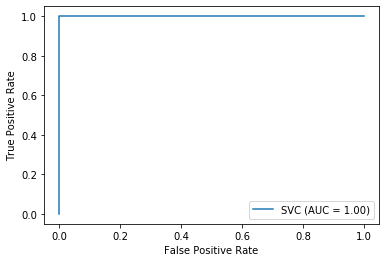

In [431]:
# ROC curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(svm_clf,X_test,y_test)